# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## Importing the dataset

In [2]:
dataset = pd.read_csv('bank_data_preprocessed.csv')

In [3]:
# The target(s) (dependent variable) is 'log price'
y = dataset['y']

# The inputs are everything BUT the dependent variable, so we can simply drop it
X = dataset.drop(['y'],axis=1)

In [4]:
X.shape

(30360, 47)

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [6]:
X_train.head()

,age,duration,campaign,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12238,31,97,2,-42.7,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
12414,43,81,3,-42.7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
21652,35,94,1,-42.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
25702,35,195,1,-46.2,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
20051,39,145,2,-36.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
X_valid

,age,duration,campaign,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12724,35,78,4,-42.7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6798,36,212,3,-36.4,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
28379,65,579,1,-40.8,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
6813,50,81,2,-36.4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4718,31,364,2,-36.4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,42,163,1,-41.8,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
15222,53,64,1,-42.7,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11437,41,184,1,-42.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8667,31,76,1,-41.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [8]:
y_valid

12724    0
6798     0
28379    1
6813     0
4718     0
        ..
6894     0
15222    0
11437    0
8667     0
25738    0
Name: y, Length: 3036, dtype: int64

In [9]:
X_test.head()

,age,duration,campaign,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
15863,38,169,5,-42.7,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
12249,31,211,3,-42.7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
17334,29,133,5,-36.1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
17071,39,108,4,-36.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22190,49,91,1,-42.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [10]:
y_test

15863    0
12249    0
17334    0
17071    0
22190    0
        ..
8249     0
13685    0
4734     0
238      0
142      0
Name: y, Length: 3036, dtype: int64

## Handling imbalanced output

In [11]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
X_train.shape

(45910, 47)

In [13]:
y_train.shape

(45910,)

In [14]:
y_train.value_counts()

y
0    22955
1    22955
Name: count, dtype: int64

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = X.columns[:4]
sc = StandardScaler()
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])
X_train.head()

,age,duration,campaign,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.783377,-1.072651,0.153707,-0.424406,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.394331,-1.167525,1.026412,-0.424406,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.390808,-1.090440,-0.718998,-0.279872,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,-0.390808,-0.491546,-0.718998,-1.147077,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0.001761,-0.788028,0.153707,0.938345,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## Part 2 - Building the ANN

### Initializing the ANN

In [59]:
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='tanh'), # Adding the input layer and the first hidden layer
    tf.keras.layers.Dense(units=200, activation='tanh'), # Adding the second hidden layer
    tf.keras.layers.Dense(units=200, activation='tanh'), # Adding the third hidden layer
    tf.keras.layers.Dense(units=2, activation='softmax') # Adding the output layer
])

## Part 3 - Training the ANN

### Compiling the ANN

In [60]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Convert labels to one-hot encoding for categorical_crossentropy
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_valid_categorical = to_categorical(y_valid)
y_test_categorical = to_categorical(y_test)

In [62]:
# np.concatenate((y_train_categorical, y_train.to_numpy().reshape(len(y_train), 1)),1)

### Training the ANN on the Training set

In [63]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

# fit the model
# note that this time the train, validation and test data are not iterable
ann.fit(X_train, # train inputs
      y_train_categorical, # train targets
      batch_size=batch_size, # batch size
      epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
      # callbacks are functions called by a task when a task is completed
      # task here is to check if val_loss is increasing
      callbacks=[early_stopping], # early stopping
      validation_data=(X_valid, y_valid_categorical), # validation data
      verbose = 1 # making sure we get enough information about the training process
      )  

Epoch 1/100
460/460 [==============================] - 3s 5ms/step - loss: 0.1360 - accuracy: 0.9492 - val_loss: 5.5032 - val_accuracy: 0.0599
Epoch 2/100
460/460 [==============================] - 2s 5ms/step - loss: 0.1111 - accuracy: 0.9570 - val_loss: 4.9188 - val_accuracy: 0.0547
Epoch 3/100
460/460 [==============================] - 2s 5ms/step - loss: 0.1036 - accuracy: 0.9592 - val_loss: 5.1750 - val_accuracy: 0.0547
Epoch 4/100
460/460 [==============================] - 2s 5ms/step - loss: 0.1006 - accuracy: 0.9603 - val_loss: 5.2708 - val_accuracy: 0.1739
Epoch 5/100
460/460 [==============================] - 2s 5ms/step - loss: 0.1002 - accuracy: 0.9602 - val_loss: 6.6837 - val_accuracy: 0.0837
Epoch 6/100
460/460 [==============================] - 2s 5ms/step - loss: 0.0952 - accuracy: 0.9621 - val_loss: 6.1606 - val_accuracy: 0.0570
Epoch 7/100
460/460 [==============================] - 2s 5ms/step - loss: 0.0931 - accuracy: 0.9620 - val_loss: 6.4085 - val_accuracy: 0.1360

## Find threshold based on Validation dataset

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve, auc
y_valid_pred_categorical = ann.predict(X_test)
y_valid_prob = y_valid_pred_categorical[:,1]
y_valid_pred = (y_valid_pred_categorical[:,1]>0.5).astype(int)
print(f"accuracy {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f'recall: {recall_score(y_valid, y_valid_pred):.4f}')
print(f'precision: {precision_score(y_valid, y_valid_pred):.4f}')
print(f'f1-score: {f1_score(y_valid, y_valid_pred):.4f}')

95/95 [==============================] - 0s 2ms/step
accuracy 0.8989
recall: 0.0361
precision: 0.0392
f1-score: 0.0376


In [48]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)
# Find the threshold that maximizes the Youden's J statistic (sensitivity + specificity - 1)
Youden_J = tpr - fpr
# Avoid division by zero by setting Youden_J to zero where fpr is zero
Youden_J_without_inf = np.where(fpr == 0, 0, Youden_J)

best_threshold_index = np.argmax(Youden_J_without_inf)
best_threshold = thresholds[best_threshold_index]
if best_threshold>=1:
    best_threshold = 0.99
elif best_threshold<0.02:
    best_threshold =0.02
print(f"Best Threshold: {best_threshold}")
# Convert probabilities to binary predictions based on the threshold
y_valid_pred = (y_valid_prob > best_threshold).astype(int)

# Evaluate the model performance
print(f'With threshold {best_threshold:.4f} from validation data:')
print(f"accuracy {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f'recall: {recall_score(y_valid, y_valid_pred):.4f}')
print(f'precision: {precision_score(y_valid, y_valid_pred):.4f}')
print(f'f1-score: {f1_score(y_valid, y_valid_pred):.4f}')

Best Threshold: 0.02
With threshold 0.0200 from validation data:
accuracy 0.8228
recall: 0.1084
precision: 0.0441
f1-score: 0.0627


## Part 5 - Making the predictions and evaluating the model

### Predicting the result of a single observation

### Predicting the Test set results

In [64]:
y_pred_categorical = ann.predict(X_test)
y_pred = (y_pred_categorical[:,1]>0.5).astype(int)
y_prob = y_pred_categorical[:,1]

95/95 [==============================] - 0s 2ms/step


### Model Evaluation Metrics on test set

In [65]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(cm)
print(f'accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall: {recall_score(y_test, y_pred):.4f}')
print(f'precision: {precision_score(y_test, y_pred):.4f}')
print(f'f1-score: {f1_score(y_test, y_pred):.4f}')
print(f'auc: {roc_auc:.4f}')

[[2795   85]
 [  69   87]]
accuracy: 0.9493
recall: 0.5577
precision: 0.5058
f1-score: 0.5305
auc: 0.9382


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2880
           1       0.48      0.47      0.47       156

    accuracy                           0.95      3036
   macro avg       0.72      0.72      0.72      3036
weighted avg       0.95      0.95      0.95      3036



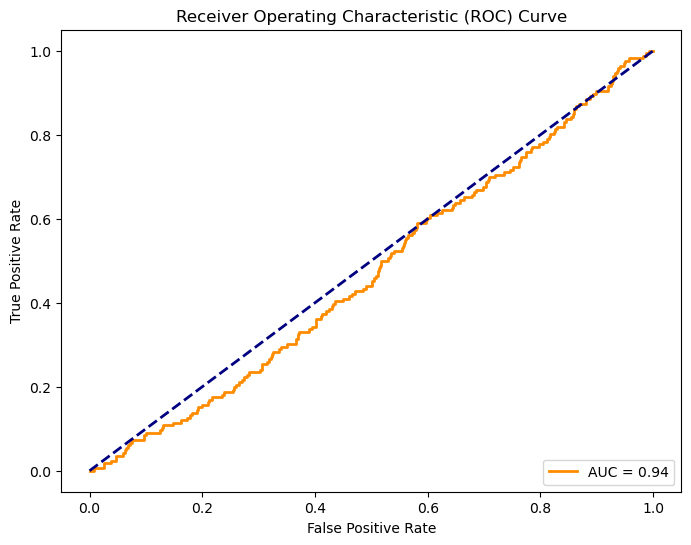

In [50]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model Evaluation Metrics on test set based on new threshold

In [51]:
y_pred_categorical = ann.predict(X_test)
y_pred_threshold_adjusted = (y_pred_categorical[:,1]>best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_threshold_adjusted)
# Evaluate the model performance
print(f'With threshold {best_threshold:.4f} found best from roc of validation set: ')
print(cm)
print(f"accuracy {accuracy_score(y_test, y_pred_threshold_adjusted):.4f}")
print(f'recall: {recall_score(y_test, y_pred_threshold_adjusted):.4f}')
print(f'precision: {precision_score(y_test, y_pred_threshold_adjusted):.4f}')
print(f'f1-score: {f1_score(y_test, y_pred_threshold_adjusted):.4f}')

95/95 [==============================] - 0s 2ms/step
With threshold 0.0200 found best from roc of validation set: 
[[2605  275]
 [  23  133]]
accuracy 0.9018
recall: 0.8526
precision: 0.3260
f1-score: 0.4716


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_threshold_adjusted))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2880
           1       0.37      0.76      0.50       156

    accuracy                           0.92      3036
   macro avg       0.68      0.84      0.73      3036
weighted avg       0.95      0.92      0.93      3036



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
# You can adjust the hyperparameters like learning_rate, n_estimators, max_depth, etc.
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [30]:
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
print(cm)
print(f'accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall: {recall_score(y_test, y_pred):.4f}')
print(f'precision: {precision_score(y_test, y_pred):.4f}')
print(f'f1-score: {f1_score(y_test, y_pred):.4f}')
# print(f'auc: {roc_auc:.4f}')

[[2746  134]
 [  64   92]]
accuracy: 0.9348
recall: 0.5897
precision: 0.4071
f1-score: 0.4817
